# Exploring the Data - Bus Stops

Goh Si Hui  
September 8, 2024

# Getting Started

## Downloading the packages

In [ ]:
pacman::p_load(tmap, sf, DT, stplanr, tidyverse)


# Importing the Data

## Passenger Volume by Origin Destination Bus Stops

## Apr 2024

``` r
odbus_apr <- read_csv("data/aspatial/origin_destination_bus_202404.csv")
```

    Rows: 5667461 Columns: 7
    ── Column specification ────────────────────────────────────────────────────────
    Delimiter: ","
    chr (5): YEAR_MONTH, DAY_TYPE, PT_TYPE, ORIGIN_PT_CODE, DESTINATION_PT_CODE
    dbl (2): TIME_PER_HOUR, TOTAL_TRIPS

    ℹ Use `spec()` to retrieve the full column specification for this data.
    ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

## May 2024

``` r
odbus_may <- read_csv("data/aspatial/origin_destination_bus_202405.csv")
```

    Rows: 5731170 Columns: 7
    ── Column specification ────────────────────────────────────────────────────────
    Delimiter: ","
    chr (5): YEAR_MONTH, DAY_TYPE, PT_TYPE, ORIGIN_PT_CODE, DESTINATION_PT_CODE
    dbl (2): TIME_PER_HOUR, TOTAL_TRIPS

    ℹ Use `spec()` to retrieve the full column specification for this data.
    ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

## Jun 2024

``` r
odbus_jun <- read_csv("data/aspatial/origin_destination_bus_202406.csv")
```

    Rows: 5658443 Columns: 7
    ── Column specification ────────────────────────────────────────────────────────
    Delimiter: ","
    chr (5): YEAR_MONTH, DAY_TYPE, PT_TYPE, ORIGIN_PT_CODE, DESTINATION_PT_CODE
    dbl (2): TIME_PER_HOUR, TOTAL_TRIPS

    ℹ Use `spec()` to retrieve the full column specification for this data.
    ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Checking the data

## Apr 2024

``` r
glimpse(odbus_apr)
```

    Rows: 5,667,461
    Columns: 7
    $ YEAR_MONTH          <chr> "2024-04", "2024-04", "2024-04", "2024-04", "2024-…
    $ DAY_TYPE            <chr> "WEEKENDS/HOLIDAY", "WEEKDAY", "WEEKENDS/HOLIDAY",…
    $ TIME_PER_HOUR       <dbl> 16, 16, 14, 14, 17, 17, 17, 17, 7, 17, 14, 10, 20,…
    $ PT_TYPE             <chr> "BUS", "BUS", "BUS", "BUS", "BUS", "BUS", "BUS", "…
    $ ORIGIN_PT_CODE      <chr> "04168", "04168", "80119", "80119", "44069", "4406…
    $ DESTINATION_PT_CODE <chr> "10051", "10051", "90079", "90079", "17229", "1722…
    $ TOTAL_TRIPS         <dbl> 2, 9, 6, 8, 1, 2, 17, 2, 6, 2, 5, 3, 7, 1, 5, 2, 1…

## May 2024

``` r
glimpse(odbus_may)
```

    Rows: 5,731,170
    Columns: 7
    $ YEAR_MONTH          <chr> "2024-05", "2024-05", "2024-05", "2024-05", "2024-…
    $ DAY_TYPE            <chr> "WEEKDAY", "WEEKENDS/HOLIDAY", "WEEKDAY", "WEEKDAY…
    $ TIME_PER_HOUR       <dbl> 17, 10, 10, 7, 7, 11, 16, 16, 16, 5, 11, 11, 18, 1…
    $ PT_TYPE             <chr> "BUS", "BUS", "BUS", "BUS", "BUS", "BUS", "BUS", "…
    $ ORIGIN_PT_CODE      <chr> "24499", "65239", "65239", "23519", "23519", "5250…
    $ DESTINATION_PT_CODE <chr> "22221", "65159", "65159", "23311", "23311", "4204…
    $ TOTAL_TRIPS         <dbl> 3, 3, 3, 1, 1, 2, 15, 3, 2, 1, 2, 4, 5, 4, 9, 43, …

## Jun 2024

``` r
glimpse(odbus_jun)
```

    Rows: 5,658,443
    Columns: 7
    $ YEAR_MONTH          <chr> "2024-06", "2024-06", "2024-06", "2024-06", "2024-…
    $ DAY_TYPE            <chr> "WEEKENDS/HOLIDAY", "WEEKDAY", "WEEKENDS/HOLIDAY",…
    $ TIME_PER_HOUR       <dbl> 21, 17, 9, 14, 13, 6, 0, 22, 8, 18, 12, 19, 10, 10…
    $ PT_TYPE             <chr> "BUS", "BUS", "BUS", "BUS", "BUS", "BUS", "BUS", "…
    $ ORIGIN_PT_CODE      <chr> "82159", "98299", "43051", "59479", "52069", "2142…
    $ DESTINATION_PT_CODE <chr> "01119", "97051", "44389", "59509", "52189", "0917…
    $ TOTAL_TRIPS         <dbl> 1, 43, 7, 1, 20, 2, 2, 3, 36, 15, 1, 2, 65, 1, 11,…

Convert the origin and destination codes into factors

## Apr 2024

``` r
odbus_apr$ORIGIN_PT_CODE <- as.factor(odbus_apr$ORIGIN_PT_CODE)

odbus_apr$DESTINATION_PT_CODE <- as.factor(odbus_apr$DESTINATION_PT_CODE)

glimpse(odbus_apr)
```

    Rows: 5,667,461
    Columns: 7
    $ YEAR_MONTH          <chr> "2024-04", "2024-04", "2024-04", "2024-04", "2024-…
    $ DAY_TYPE            <chr> "WEEKENDS/HOLIDAY", "WEEKDAY", "WEEKENDS/HOLIDAY",…
    $ TIME_PER_HOUR       <dbl> 16, 16, 14, 14, 17, 17, 17, 17, 7, 17, 14, 10, 20,…
    $ PT_TYPE             <chr> "BUS", "BUS", "BUS", "BUS", "BUS", "BUS", "BUS", "…
    $ ORIGIN_PT_CODE      <fct> 04168, 04168, 80119, 80119, 44069, 44069, 20281, 2…
    $ DESTINATION_PT_CODE <fct> 10051, 10051, 90079, 90079, 17229, 17229, 20141, 2…
    $ TOTAL_TRIPS         <dbl> 2, 9, 6, 8, 1, 2, 17, 2, 6, 2, 5, 3, 7, 1, 5, 2, 1…

## May 2024

``` r
odbus_may$ORIGIN_PT_CODE <- as.factor(odbus_may$ORIGIN_PT_CODE)

odbus_may$DESTINATION_PT_CODE <- as.factor(odbus_may$DESTINATION_PT_CODE)

glimpse(odbus_may)
```

    Rows: 5,731,170
    Columns: 7
    $ YEAR_MONTH          <chr> "2024-05", "2024-05", "2024-05", "2024-05", "2024-…
    $ DAY_TYPE            <chr> "WEEKDAY", "WEEKENDS/HOLIDAY", "WEEKDAY", "WEEKDAY…
    $ TIME_PER_HOUR       <dbl> 17, 10, 10, 7, 7, 11, 16, 16, 16, 5, 11, 11, 18, 1…
    $ PT_TYPE             <chr> "BUS", "BUS", "BUS", "BUS", "BUS", "BUS", "BUS", "…
    $ ORIGIN_PT_CODE      <fct> 24499, 65239, 65239, 23519, 23519, 52509, 03151, 5…
    $ DESTINATION_PT_CODE <fct> 22221, 65159, 65159, 23311, 23311, 42041, 11161, 5…
    $ TOTAL_TRIPS         <dbl> 3, 3, 3, 1, 1, 2, 15, 3, 2, 1, 2, 4, 5, 4, 9, 43, …

## Jun 2024

``` r
odbus_jun$ORIGIN_PT_CODE <- as.factor(odbus_jun$ORIGIN_PT_CODE)

odbus_jun$DESTINATION_PT_CODE <- as.factor(odbus_jun$DESTINATION_PT_CODE)

glimpse(odbus_jun)
```

    Rows: 5,658,443
    Columns: 7
    $ YEAR_MONTH          <chr> "2024-06", "2024-06", "2024-06", "2024-06", "2024-…
    $ DAY_TYPE            <chr> "WEEKENDS/HOLIDAY", "WEEKDAY", "WEEKENDS/HOLIDAY",…
    $ TIME_PER_HOUR       <dbl> 21, 17, 9, 14, 13, 6, 0, 22, 8, 18, 12, 19, 10, 10…
    $ PT_TYPE             <chr> "BUS", "BUS", "BUS", "BUS", "BUS", "BUS", "BUS", "…
    $ ORIGIN_PT_CODE      <fct> 82159, 98299, 43051, 59479, 52069, 21421, 81029, 2…
    $ DESTINATION_PT_CODE <fct> 01119, 97051, 44389, 59509, 52189, 09179, 07211, 2…
    $ TOTAL_TRIPS         <dbl> 1, 43, 7, 1, 20, 2, 2, 3, 36, 15, 1, 2, 65, 1, 11,…

## Geospatial Data

In [ ]:
busstop <- st_read(dsn = "data/spatial",
                   layer = "BusStop")


Reading layer `BusStop' from data source 
  `C:\sihuihui\mitbcapstone\notebooks\data\spatial' using driver `ESRI Shapefile'
Simple feature collection with 5166 features and 3 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 3970.122 ymin: 26482.1 xmax: 48285.52 ymax: 52983.82
Projected CRS: SVY21

Rows: 5,166
Columns: 4
$ BUS_STOP_N <chr> "65059", "16171", "61101", "01239", "17269", "11291", "1153…
$ BUS_ROOF_N <chr> "B12", "B06", "NIL", "B01", "B01", "B17", "B12", "B05", "B0…
$ LOC_DESC   <chr> "ST ANNE'S CH", "YUSOF ISHAK HSE", "BLK 120", "SULTAN PLAZA…
$ geometry   <POINT [m]> POINT (35565.66 41659.52), POINT (21439.91 31253.63),…

In [ ]:
busstop <- st_transform(busstop, crs = 3414)
glimpse(busstop)


Rows: 5,166
Columns: 4
$ BUS_STOP_N <chr> "65059", "16171", "61101", "01239", "17269", "11291", "1153…
$ BUS_ROOF_N <chr> "B12", "B06", "NIL", "B01", "B01", "B17", "B12", "B05", "B0…
$ LOC_DESC   <chr> "ST ANNE'S CH", "YUSOF ISHAK HSE", "BLK 120", "SULTAN PLAZA…
$ geometry   <POINT [m]> POINT (35565.66 41659.52), POINT (21439.91 31253.63),…

In [ ]:
busstop$BUS_STOP_N <- as.factor(busstop$BUS_STOP_N)
busstop


Simple feature collection with 5166 features and 3 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 3970.122 ymin: 26482.1 xmax: 48285.52 ymax: 52983.82
Projected CRS: SVY21 / Singapore TM
First 10 features:
   BUS_STOP_N BUS_ROOF_N                 LOC_DESC                  geometry
1       65059        B12             ST ANNE'S CH POINT (35565.66 41659.52)
2       16171        B06          YUSOF ISHAK HSE POINT (21439.91 31253.63)
3       61101        NIL                  BLK 120 POINT (31381.06 35313.49)
4       01239        B01             SULTAN PLAZA POINT (31152.55 31688.08)
5       17269        B01                  BLK 730  POINT (20134.2 31917.38)
6       11291        B17      COLD STORAGE JELITA POINT (22723.57 33349.85)
7       11531        B12 OPP LEA HIN HARDWARE FTY POINT (25112.11 30368.68)
8       46529        B05        OPP MARSILING STN POINT (21465.51 45974.12)
9       95151        B01       AIRPORT POLICE STN POINT (44529.73 36038.38)
10      71169 

In [ ]:
busstop <- write_rds(busstop, "data/rds/busstop.rds")


Importing the planning subzone data

In [ ]:
mpsz <- st_read(dsn = "data/spatial",
                layer = "MPSZ-2019") 


Reading layer `MPSZ-2019' from data source 
  `C:\sihuihui\mitbcapstone\notebooks\data\spatial' using driver `ESRI Shapefile'
Simple feature collection with 332 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 103.6057 ymin: 1.158699 xmax: 104.0885 ymax: 1.470775
Geodetic CRS:  WGS 84

transform mpsz from WGS 84 to CRS SVY21

In [ ]:
mpsz <- st_transform(mpsz, crs = 3414)
mpsz


Simple feature collection with 332 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 2667.538 ymin: 15748.72 xmax: 56396.44 ymax: 50256.33
Projected CRS: SVY21 / Singapore TM
First 10 features:
                 SUBZONE_N SUBZONE_C       PLN_AREA_N PLN_AREA_C       REGION_N
1              MARINA EAST    MESZ01      MARINA EAST         ME CENTRAL REGION
2         INSTITUTION HILL    RVSZ05     RIVER VALLEY         RV CENTRAL REGION
3           ROBERTSON QUAY    SRSZ01  SINGAPORE RIVER         SR CENTRAL REGION
4  JURONG ISLAND AND BUKOM    WISZ01  WESTERN ISLANDS         WI    WEST REGION
5             FORT CANNING    MUSZ02           MUSEUM         MU CENTRAL REGION
6         MARINA EAST (MP)    MPSZ05    MARINE PARADE         MP CENTRAL REGION
7                   SUDONG    WISZ03  WESTERN ISLANDS         WI    WEST REGION
8                  SEMAKAU    WISZ02  WESTERN ISLANDS         WI    WEST REGION
9           SOUTHERN GROUP    SISZ02 SOUTHERN I

In [ ]:
mpsz <- write_rds(mpsz, "data/rds/mpsz.rds")


# Geospatial Data Wrangling

combine busstop and mpsz to find out which subzone each bus stop is located in

In [ ]:
busstop_mpsz <- st_intersection(busstop, mpsz) %>%
  select(BUS_STOP_N, SUBZONE_N, SUBZONE_C) %>%
  st_drop_geometry()


all geometries

In [ ]:
datatable(busstop_mpsz)


In [ ]:
write_rds(busstop_mpsz, "data/rds/busstop_mpsz.rds")  


In [ ]:
odbus_apr_6_9 <- odbus_apr %>%
  filter(DAY_TYPE == "WEEKDAY") %>%
  filter(TIME_PER_HOUR >= 6 &
           TIME_PER_HOUR <= 9) %>%
  group_by(ORIGIN_PT_CODE,
           DESTINATION_PT_CODE) %>%
  summarise(TRIPS = sum(TOTAL_TRIPS))


`summarise()` has grouped output by 'ORIGIN_PT_CODE'. You can override using
the `.groups` argument.

In [ ]:
odbus_may_6_9 <- odbus_may %>%
  filter(DAY_TYPE == "WEEKDAY") %>%
  filter(TIME_PER_HOUR >= 6 &
           TIME_PER_HOUR <= 9) %>%
  group_by(ORIGIN_PT_CODE,
           DESTINATION_PT_CODE) %>%
  summarise(TRIPS = sum(TOTAL_TRIPS))


`summarise()` has grouped output by 'ORIGIN_PT_CODE'. You can override using
the `.groups` argument.

In [ ]:
odbus_jun_6_9 <- odbus_jun %>%
  filter(DAY_TYPE == "WEEKDAY") %>%
  filter(TIME_PER_HOUR >= 6 &
           TIME_PER_HOUR <= 9) %>%
  group_by(ORIGIN_PT_CODE,
           DESTINATION_PT_CODE) %>%
  summarise(TRIPS = sum(TOTAL_TRIPS))


`summarise()` has grouped output by 'ORIGIN_PT_CODE'. You can override using
the `.groups` argument.

In [ ]:
od_apr <- left_join(odbus_apr_6_9, busstop_mpsz,
                    by = c("ORIGIN_PT_CODE" = "BUS_STOP_N")) %>%
  rename(ORIGIN_BS = ORIGIN_PT_CODE,
         ORIGIN_SZ = SUBZONE_C,
         ORIGIN_SZ_NAME = SUBZONE_N, 
         DESTIN_BS = DESTINATION_PT_CODE)


Warning in left_join(odbus_apr_6_9, busstop_mpsz, by = c(ORIGIN_PT_CODE = "BUS_STOP_N")): Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 16083 of `x` matches multiple rows in `y`.
ℹ Row 674 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.

In [ ]:
duplicate <- od_apr %>%
  group_by_all() %>%
  filter(n()>1) %>%
  ungroup()


In [ ]:
od_apr <- unique(od_apr)


In [ ]:
duplicate <- od_apr %>%
  group_by_all() %>%
  filter(n()>1) %>%
  ungroup()


In [ ]:
od_apr <- left_join(od_apr , busstop_mpsz,
            by = c("DESTIN_BS" = "BUS_STOP_N")) 


Warning in left_join(od_apr, busstop_mpsz, by = c(DESTIN_BS = "BUS_STOP_N")): Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 163 of `x` matches multiple rows in `y`.
ℹ Row 673 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.

In [ ]:
duplicate <- od_apr %>%
  group_by_all() %>%
  filter(n()>1) %>%
  ungroup()


In [ ]:
od_apr <- unique(od_apr)


In [ ]:
duplicate <- od_apr %>%
  group_by_all() %>%
  filter(n()>1) %>%
  ungroup()


In [ ]:
od_apr <- od_apr %>%
  rename(DESTIN_SZ = SUBZONE_C) %>%
  drop_na() %>%
  group_by(ORIGIN_SZ, DESTIN_SZ) %>%
  summarise(MORNING_PEAK = sum(TRIPS))


`summarise()` has grouped output by 'ORIGIN_SZ'. You can override using the
`.groups` argument.

In [ ]:
write_rds(od_apr, "data/rds/od_apr_fij.rds")


# Visualising Spatial Interaction

## Remove intra-zonal flows

In [ ]:
od_apr_fij <- od_apr[od_apr$ORIGIN_SZ!=od_apr$DESTIN_SZ,]


In [ ]:
flowline_apr<- od2line(flow = od_apr_fij, 
                    zones = mpsz,
                    zone_code = "SUBZONE_C")


Creating centroids representing desire line start and end points.

Warning in g$scale * (w_legend/maxW): longer object length is not a multiple of
shorter object length

Warning in g$scale * (x/maxW): longer object length is not a multiple of
shorter object length

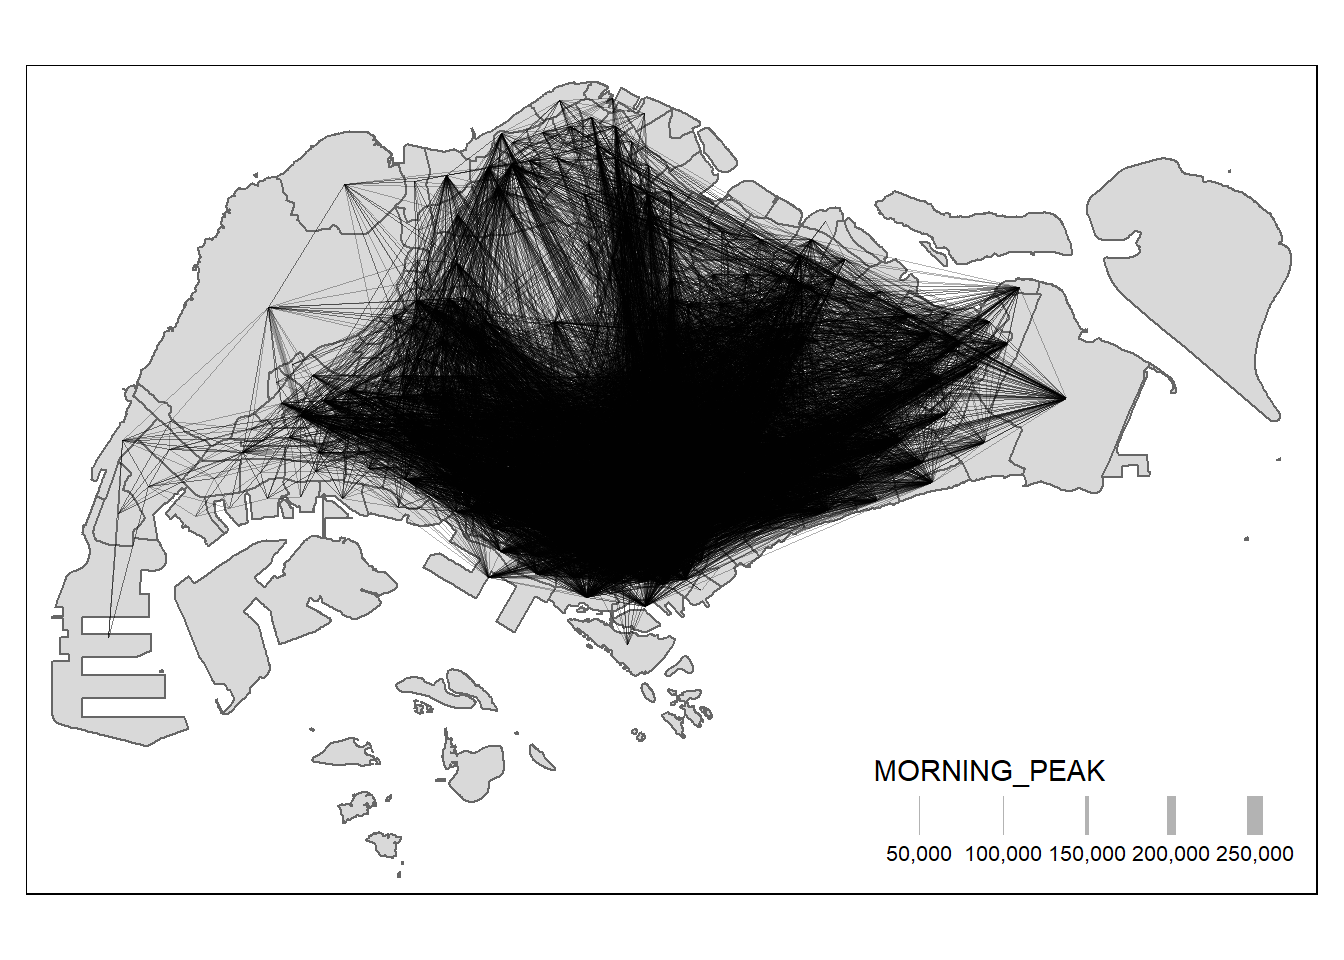

In [ ]:
tm_shape(mpsz) +
  tm_polygons() +
flowline_apr%>%  
tm_shape() +
  tm_lines(lwd = "MORNING_PEAK",
           style = "quantile",
           scale = c(0.1, 1, 3, 5, 7, 10),
           n = 6,
           alpha = 0.3)


Warning in g$scale * (w_legend/maxW): longer object length is not a multiple of
shorter object length

Warning in g$scale * (x/maxW): longer object length is not a multiple of
shorter object length

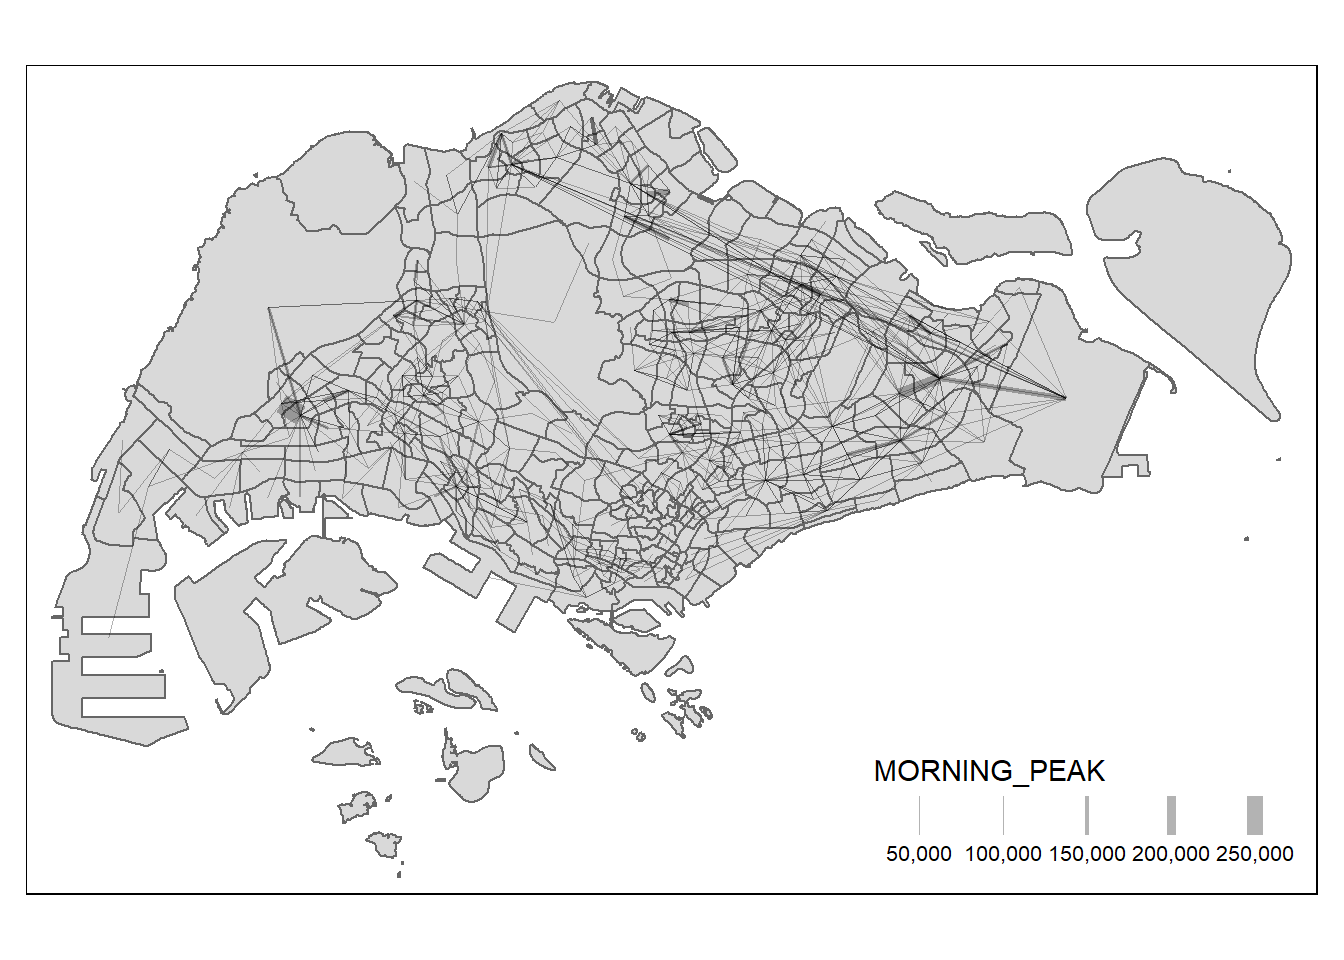

In [ ]:
tm_shape(mpsz) +
  tm_polygons() +
flowline_apr %>%
  filter(MORNING_PEAK >= 5000) %>%
tm_shape() +
  tm_lines(lwd = "MORNING_PEAK",
           style = "quantile",
           scale = c(0.1, 1, 3, 5, 7, 10),
           n = 6,
           alpha = 0.3)


Warning in g$scale * (w_legend/maxW): longer object length is not a multiple of
shorter object length

Warning in g$scale * (x/maxW): longer object length is not a multiple of
shorter object length

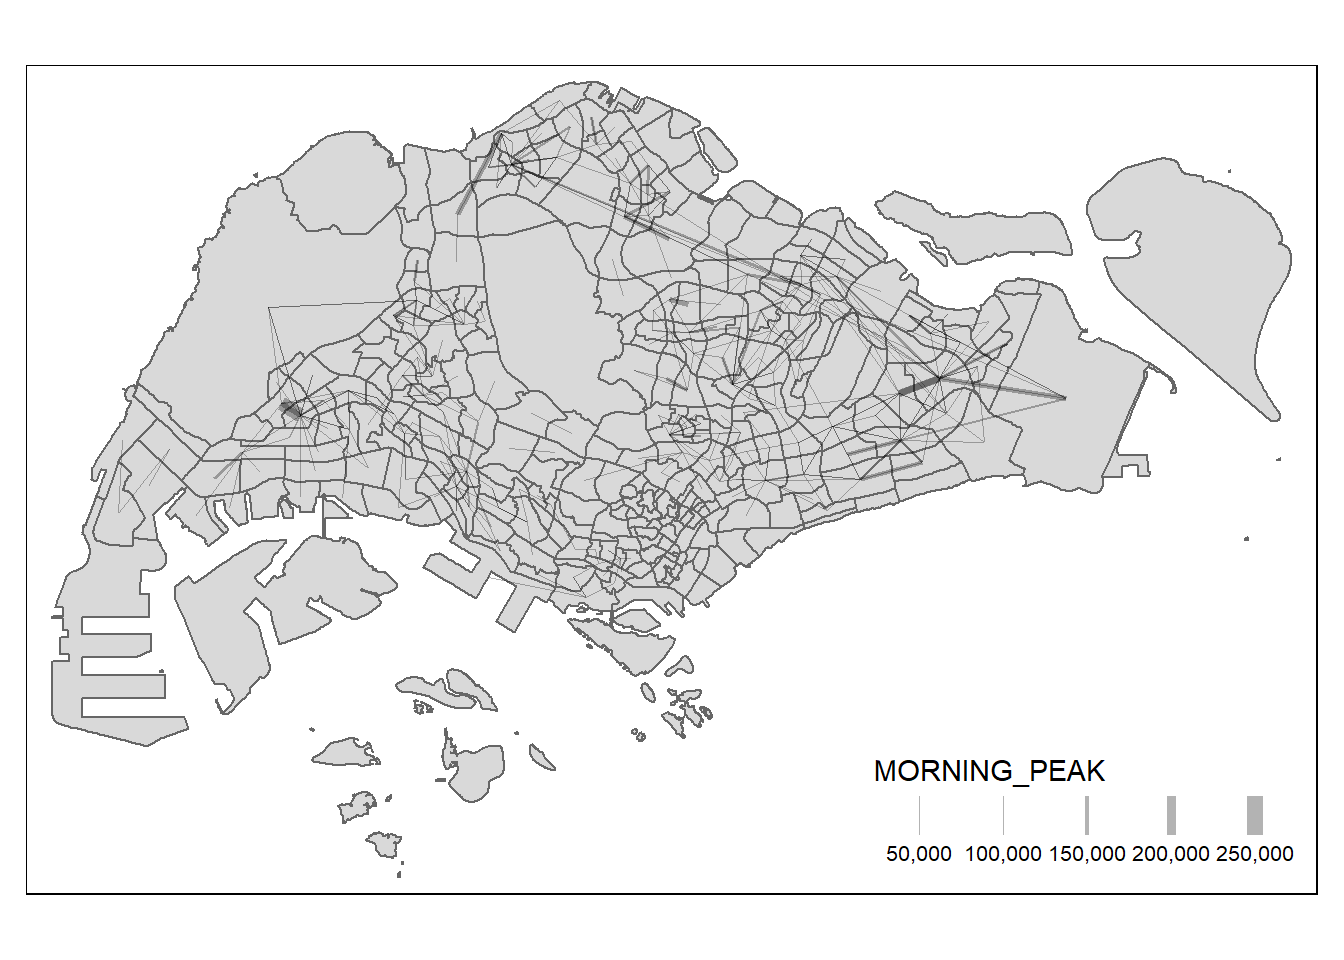

In [ ]:
tm_shape(mpsz) +
  tm_polygons() +
flowline_apr %>%
  filter(MORNING_PEAK >= 10000) %>%
tm_shape() +
  tm_lines(lwd = "MORNING_PEAK",
           style = "quantile",
           scale = c(0.1, 1, 3, 5, 7, 10),
           n = 6,
           alpha = 0.3)
